In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt

### EV Adoption in NYC
data organized by Altas

check out data description: https://www.atlasevhub.com/materials/state-ev-registration-data 

Borough organized based on zipcode

In [2]:
adoption = pd.read_csv('ny_regist_altas.csv')
adoption = adoption.loc[:,~adoption.columns.isin(['State'])]
adoption['Registration Date'] = pd.to_datetime(adoption['Registration Date'])
adoption

,ZIP Code,Registration Date,Vehicle Make,Vehicle Model,Vehicle Model Year,Drivetrain Type,Vehicle GVWR Class,Vehicle Category,Vehicle Count,DMV Snapshot ID,DMV Snapshot (Date),Latest DMV Snapshot Flag,Borough
0,11040,2020-08-01,TESLA,MODEL X,2018,BEV,2A,Light-Duty (Class 1-2A),2,49,DMV Snapshot (4/1/2021),False,Queens
1,10128,2018-11-01,TESLA,MODEL X,2018,BEV,2A,Light-Duty (Class 1-2A),2,39,DMV Snapshot (6/2/2020),False,Manhattan
2,11040,2020-10-01,TESLA,MODEL X,2018,BEV,2A,Light-Duty (Class 1-2A),2,50,DMV Snapshot (5/1/2021),False,Queens
3,10010,2020-06-01,TESLA,MODEL X,2018,BEV,2A,Light-Duty (Class 1-2A),2,54,DMV Snapshot (9/2/2021),False,Manhattan
4,10013,2018-08-01,TESLA,MODEL X,2018,BEV,2A,Light-Duty (Class 1-2A),2,24,DMV Snapshot (3/2/2019),False,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25833,11361,2021-08-01,TOYOTA,PRIUS PRIME,2017,PHEV,1,Light-Duty (Class 1-2A),1,54,DMV Snapshot (9/2/2021),False,Queens
25834,11429,2021-08-01,TOYOTA,PRIUS PRIME,2017,PHEV,1,Light-Duty (Class 1-2A),1,64,DMV Snapshot (7/1/2022),False,Queens
25835,11693,2021-08-01,TOYOTA,PRIUS PRIME,2017,PHEV,1,Light-Duty (Class 1-2A),1,57,DMV Snapshot (12/1/2021),False,Queens
25836,11367,2021-08-01,TOYOTA,PRIUS PRIME,2017,PHEV,1,Light-Duty (Class 1-2A),1,54,DMV Snapshot (9/2/2021),False,Queens


/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/3988893347.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_num_boro = adoption.groupby(by=[adoption['Registration Date'].dt.year,'Borough']).sum()['Vehicle Count'].reset_index().rename(columns={'Registration Date':'Year'})


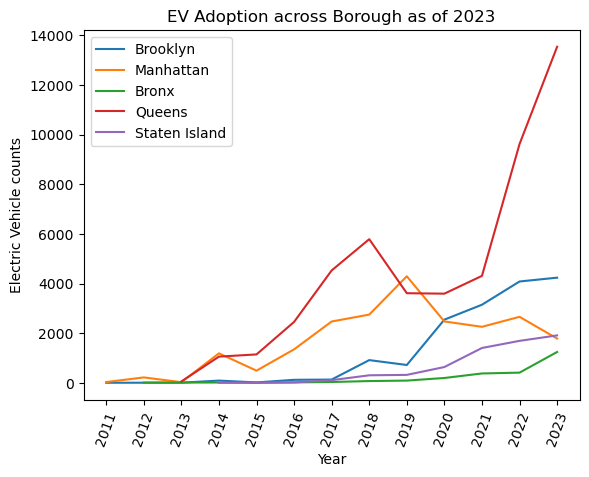

In [21]:
### timeseies plot for adoption across the boroughs
plot_num_boro = adoption.groupby(by=[adoption['Registration Date'].dt.year,'Borough']).sum()['Vehicle Count'].reset_index().rename(columns={'Registration Date':'Year'})
## ignore data 2024
plot_num_boro = plot_num_boro[plot_num_boro['Year']!=2024]
for b in plot_num_boro.Borough.unique():
    boro_data = plot_num_boro[plot_num_boro['Borough']==b]
    plt.plot(boro_data['Year'], boro_data['Vehicle Count'], label = b)

plt.legend()
plt.title('EV Adoption across Borough as of 2023')
plt.ylabel('Electric Vehicle counts')
plt.xlabel('Year')
plt.xticks(plot_num_boro.Year.unique(), rotation=70)
plt.show()

plot_num_boro.to_csv('ev_adoption_boro_year.csv', index=False)

### Spatial Visualization

1. Visualized Number of EV per zip code areas

2. Visualized Number of EV per zip code areas across time (from 2016 to 2023)

In [4]:
zipcode = pd.read_csv("Modified_Zip_Code_Tabulation_Areas.csv")  ## read the CSV
zipcode['geometry'] = zipcode['the_geom'].apply(wkt.loads)
zipcode = gpd.GeoDataFrame(zipcode, geometry='geometry', crs="EPSG:4326")

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_95047/2412628099.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zipcode.merge(adoption.groupby('ZIP Code').sum()['Vehicle Count'], how='left',


<Axes: >

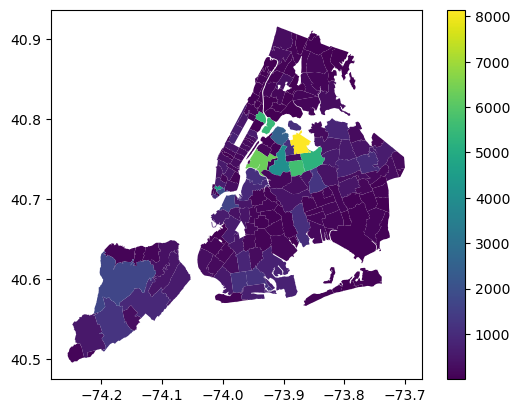

In [5]:
zipcode.merge(adoption.groupby('ZIP Code').sum()['Vehicle Count'], how='left',
              left_on='MODZCTA', right_on='ZIP Code').plot(column='Vehicle Count', legend=True)

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/998720738.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',
/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/998720738.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',
/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/998720738.py:12: Futu

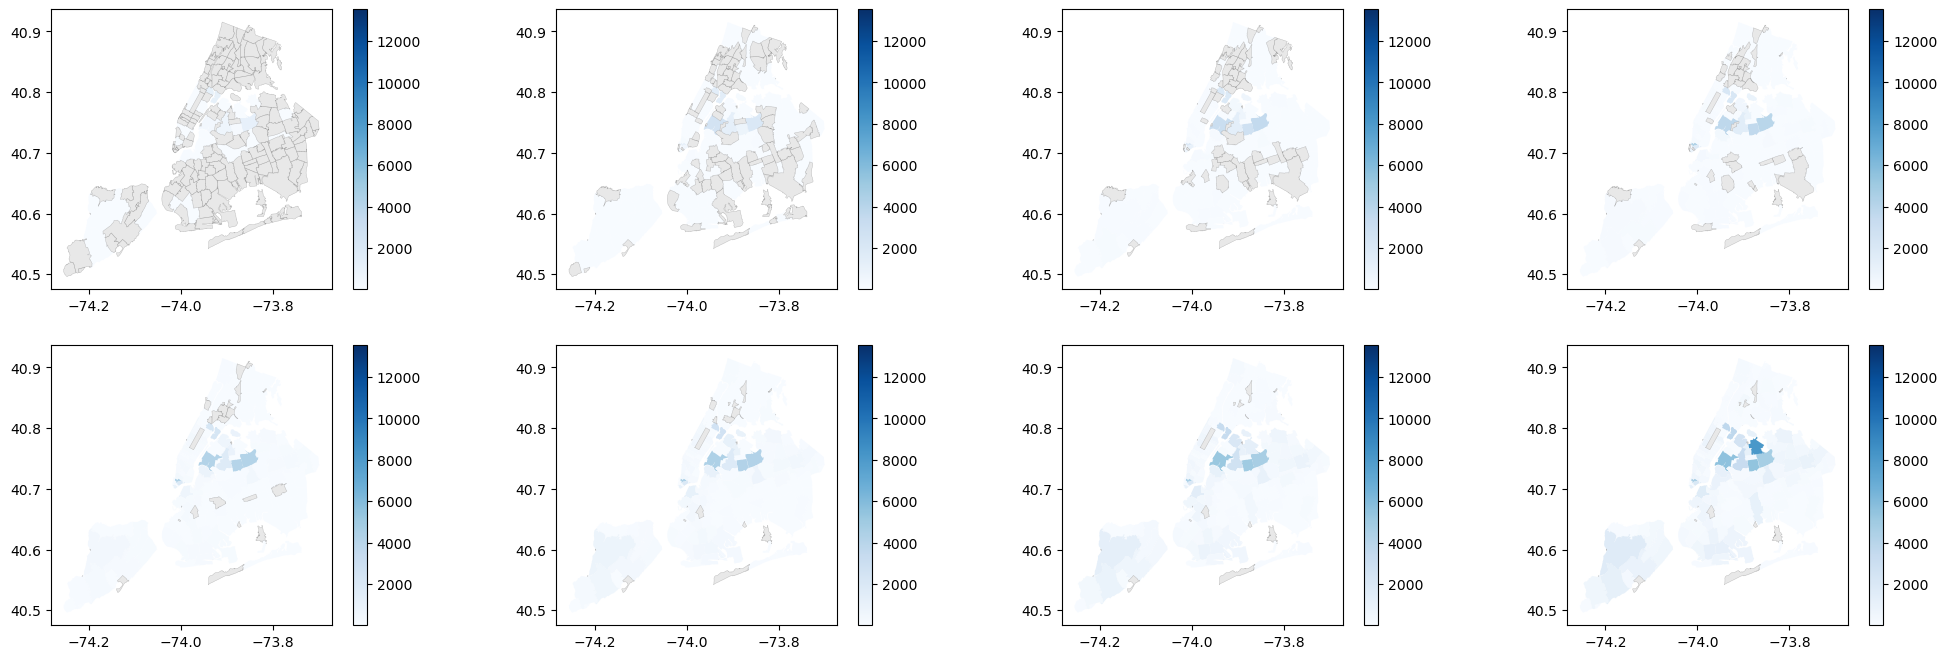

In [22]:
value_min = plot_num_boro['Vehicle Count'].min()
value_max = plot_num_boro['Vehicle Count'].max()
fig,ax = plt.subplots(nrows=2, ncols=4,figsize=(25,8))
y_list = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
j=0
for i in range(len(y_list)):
    if i>=4:
        j = 1
        x_posi = i-4
    else:
        x_posi = i
    zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',
              left_on='MODZCTA', right_on='ZIP Code').plot(ax=ax[j][x_posi], column='Vehicle Count', cmap='Blues', vmin=value_min, vmax=value_max, legend=True,
                                                           missing_kwds = {"color": "lightgrey", ## what to do with missing values
                                                                                        "edgecolor": "grey",
                                                                                        "linewidth": 0.3,
                                                                                        "alpha": 0.5
                                                                                        },)

### Combine with census tract data

1. Combined census tract to zipcode: as these two tabulation areas are not hierarchical, estimated data from census tract will be simply divided by the number of covered zipcode areas (using UPSP Dataset API: https://www.huduser.gov/portal/dataset/uspszip-api.html )

2. Vehicle by household in American Census Survey 5-Year in 2017 and 2022 (Using Census data API: https://api.census.gov/data/2022/acs/acs1/variables.html [Variables List] )

3. Clean and Calculation: As data obtained from API are all with string type, need to covert as float to calculate the rate of vehicle-owning household.

4. Visualized Number of EV per car-owning houshold

In [29]:
import pandas as pd
import requests

token = "{YOUR_APIKKEY}"

def census_to_zip(token, geoid):
    url = "https://www.huduser.gov/hudapi/public/usps?type=6&query={}".format(geoid)
    headers = {"Authorization": "Bearer {0}".format(token)}

    response = requests.get(url, headers = headers)

    if response.status_code != 200:
        print ("Failure, see status code: {0}".format(response.status_code))
        return ''
    else: 
        zipcode = [i['geoid'] for i in response.json()["data"]["results"]]
        return ','.join(zipcode)
        

In [ ]:
census_tract = gpd.read_file('census_tract/ny_census_tract.shp')
census_tract['ZIPCODE'] = census_tract['GEOID'].apply(lambda geoid: census_to_zip(token, geoid))
#there are still 153 census tract that cannot find corresponding zipcode areas

In [56]:
try: #spelling depends on enviroment version 
    import urllib2 as urllib #URL handling module
except ImportError:
    import urllib.request as urllib
import json


kwd = {
    'Vehicles': 'B08137_001E,B08137_002E,B08137_003E,B08137_004E,B08137_005E,B08137_006E',
    'VehicleAvailable': 'B08201_001E,B08201_002E,B08201_003E,B08201_004E,B08201_005E,B08201_006E'
}
kwd_columns = {
    'Vehicles': ['total_household','household_owner','household_renter','total_drove_alone',
                 'drove_owner','drove_renter'],
    'VehicleAvailable': ['total', 'no_vehicle', 'vehicle_1', 'vehicle_2','vehicle_3','vehicle_4_more']
}
def get_ACSdata(keys, year='2022'):
    url = 'https://api.census.gov/data/{}/acs/acs5?get={}&for=tract:*&in=state:36&in=county:081,085,005,047,061'\
        .format(year, kwd[keys])
    print(url)
    data = urllib.urlopen(url).read().decode('utf-8')
    data = json.loads(data)
    dataframe = pd.DataFrame(data[1:],columns=data[0])
    dataframe['GEOID'] = dataframe['state']+dataframe['county']+dataframe['tract']
    dataframe = dataframe.loc[:, ~dataframe.columns.isin(['state','county','tract'])]
    dataframe.columns = kwd_columns[keys] + ['GEOID']
    return dataframe

In [57]:
car_meansoftransp = get_ACSdata('Vehicles')
car_vehicle = get_ACSdata('VehicleAvailable')
car_vehicle_2017 = get_ACSdata('VehicleAvailable', 2017)

https://api.census.gov/data/2022/acs/acs5?get=B08137_001E,B08137_002E,B08137_003E,B08137_004E,B08137_005E,B08137_006E&for=tract:*&in=state:36&in=county:081,085,005,047,061
https://api.census.gov/data/2022/acs/acs5?get=B08201_001E,B08201_002E,B08201_003E,B08201_004E,B08201_005E,B08201_006E&for=tract:*&in=state:36&in=county:081,085,005,047,061
https://api.census.gov/data/2017/acs/acs5?get=B08201_001E,B08201_002E,B08201_003E,B08201_004E,B08201_005E,B08201_006E&for=tract:*&in=state:36&in=county:081,085,005,047,061


In [61]:
car_meansoftransp['communte_by_car_by_household'] = car_meansoftransp['total_drove_alone'].astype('int')/car_meansoftransp['total_household'].astype('int')

In [63]:
car_vehicle['household_w_car'] = car_vehicle['vehicle_1'].astype('int') + car_vehicle['vehicle_2'].astype('int')\
                                          + car_vehicle['vehicle_3'].astype('int') + car_vehicle['vehicle_4_more'].astype('int')
car_vehicle['rate_w_car'] = car_vehicle['household_w_car']/car_vehicle['total'].astype('int')

car_vehicle

,total,no_vehicle,vehicle_1,vehicle_2,vehicle_3,vehicle_4_more,GEOID,household_w_car,rate_w_car
0,0,0,0,0,0,0,36005000100,0,NaN
1,1425,301,585,503,36,0,36005000200,1124,0.788772
2,2309,600,937,524,176,72,36005000400,1709,0.740147
3,2205,1193,636,305,18,53,36005001600,1012,0.458957
4,940,699,196,45,0,0,36005001901,241,0.256383
...,...,...,...,...,...,...,...,...,...
2322,2075,170,823,718,289,75,36085030302,1905,0.918072
2323,1188,792,243,107,12,34,36085031901,396,0.333333
2324,1585,527,526,319,169,44,36085031902,1058,0.667508
2325,425,121,198,106,0,0,36085032300,304,0.715294


In [64]:
car_vehicle_2017['household_w_car_2017'] = car_vehicle_2017['vehicle_1'].astype('int') + car_vehicle_2017['vehicle_2'].astype('int')\
                                          + car_vehicle_2017['vehicle_3'].astype('int') + car_vehicle_2017['vehicle_4_more'].astype('int')
car_vehicle_2017['rate_w_car_2017'] = car_vehicle_2017['household_w_car']/car_vehicle_2017['total'].astype('int')

car_vehicle_2017

,total,no_vehicle,vehicle_1,vehicle_2,vehicle_3,vehicle_4_more,GEOID,household_w_car,rate_w_car,household_w_car_2017,rate_w_car_2017
0,3273,2282,776,215,0,0,36061016500,991,0.302780,991,0.302780
1,3985,2900,883,137,24,41,36061027900,1085,0.272271,1085,0.272271
2,665,510,143,12,0,0,36061011203,155,0.233083,155,0.233083
3,3115,2564,537,14,0,0,36061018400,551,0.176886,551,0.176886
4,2500,1613,810,64,13,0,36047015900,887,0.354800,887,0.354800
...,...,...,...,...,...,...,...,...,...,...,...
2162,1638,1003,543,92,0,0,36047002200,635,0.387668,635,0.387668
2163,572,453,96,23,0,0,36047003700,119,0.208042,119,0.208042
2164,522,105,241,163,8,5,36047004600,417,0.798851,417,0.798851
2165,797,349,437,11,0,0,36047004700,448,0.562108,448,0.562108


In [65]:
census_calculate = pd.read_csv('ny_census_tract_calculate.csv')
census_calculate = census_calculate.loc[:, ~census_calculate.columns.isin(['total_vehicle','1vehicle_available','2vehicle_available','ptg_commuteBycar',
                                                                           'vehicle_density'])]
census_calculate['GEOID'] = census_calculate['GEOID'].astype('str')
census_calculate = census_calculate.merge( car_vehicle[['GEOID','household_w_car','rate_w_car']], on='GEOID', how="left" )
census_calculate = census_calculate.merge( car_vehicle_2017[['GEOID','household_w_car_2017','rate_w_car_2017']], on='GEOID', how="left" )
census_calculate = census_calculate.merge( car_meansoftransp[['GEOID', 'communte_by_car_by_household']], on='GEOID', how='left' )

census_calculate

,GEOID,ptg_owner_unit_resident,ptg_renter_unit_resident,ptg_race_white,ptg_race_black,pop_density_perSqkm,household_w_car,rate_w_car,household_w_car_2017,rate_w_car_2017,communte_by_car_by_household
0,36005000100,0.000000,0.000000,0.426901,0.464238,2650.830844,0,NaN,0,NaN,NaN
1,36005000200,0.677154,0.322846,0.154004,0.302464,10867.988529,1124,0.788772,1078,0.816048,0.448052
2,36005000400,0.676830,0.323170,0.126259,0.303180,8069.217040,1709,0.740147,1475,0.762274,0.462249
3,36005001600,0.207321,0.792679,0.089202,0.371054,12734.034526,1012,0.458957,998,0.508665,0.360937
4,36005002300,0.000000,1.000000,0.108216,0.427562,43270.103684,264,0.137285,361,0.182139,0.136951
...,...,...,...,...,...,...,...,...,...,...,...
2029,36085030301,0.711447,0.288553,0.557904,0.023838,8223.055418,1892,0.932939,1550,0.863029,0.537631
2030,36085030302,0.835972,0.164028,0.438500,0.254001,7013.929925,1905,0.918072,1813,0.913350,0.588636
2031,36085031901,0.273702,0.726298,0.233533,0.460261,9467.852081,396,0.333333,349,0.330180,0.279160
2032,36085031902,0.628262,0.371738,0.188403,0.512963,7317.472293,1058,0.667508,953,0.556984,0.510667


In [66]:
census_calculate.to_csv('ny_census_tract_calculate.csv', index=False)

In [78]:
census_tract['num_of_covered_area'] = census_tract['ZIPCODE'].apply(lambda s: len(s.split(',')) if s!='' else 0)
census_calculate = census_calculate.merge(census_tract[['GEOID', 'num_of_covered_area']], how='left', on='GEOID')

In [80]:
census_calculate['avg_household_w_car_2022'] = census_calculate['household_w_car']/census_calculate['num_of_covered_area']
census_calculate['avg_household_w_car_2017'] = census_calculate['household_w_car_2017']/census_calculate['num_of_covered_area']
census_calculate

,GEOID,ptg_owner_unit_resident,ptg_renter_unit_resident,ptg_race_white,ptg_race_black,pop_density_perSqkm,household_w_car,rate_w_car,household_w_car_2017,rate_w_car_2017,communte_by_car_by_household,num_of_covered_area,avg_household_w_car_2022,avg_household_w_car_2017
0,36005000100,0.000000,0.000000,0.426901,0.464238,2650.830844,0,NaN,0,NaN,NaN,0,NaN,NaN
1,36005000200,0.677154,0.322846,0.154004,0.302464,10867.988529,1124,0.788772,1078,0.816048,0.448052,1,1124.0,1078.0
2,36005000400,0.676830,0.323170,0.126259,0.303180,8069.217040,1709,0.740147,1475,0.762274,0.462249,2,854.5,737.5
3,36005001600,0.207321,0.792679,0.089202,0.371054,12734.034526,1012,0.458957,998,0.508665,0.360937,1,1012.0,998.0
4,36005002300,0.000000,1.000000,0.108216,0.427562,43270.103684,264,0.137285,361,0.182139,0.136951,1,264.0,361.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,36085030301,0.711447,0.288553,0.557904,0.023838,8223.055418,1892,0.932939,1550,0.863029,0.537631,2,946.0,775.0
2030,36085030302,0.835972,0.164028,0.438500,0.254001,7013.929925,1905,0.918072,1813,0.913350,0.588636,2,952.5,906.5
2031,36085031901,0.273702,0.726298,0.233533,0.460261,9467.852081,396,0.333333,349,0.330180,0.279160,1,396.0,349.0
2032,36085031902,0.628262,0.371738,0.188403,0.512963,7317.472293,1058,0.667508,953,0.556984,0.510667,1,1058.0,953.0


In [74]:
geoid_to_zip = []
for i in range(len(census_tract)):
    
    record = census_tract.iloc[i]
    if record['ZIPCODE'] != "":
        for zc in record['ZIPCODE'].split(','):
            new_dict_rec = dict()
            new_dict_rec['GEOID'] = record['GEOID']
            new_dict_rec['zipcode'] = zc
            geoid_to_zip.append(new_dict_rec)

census_to_zip = pd.DataFrame(geoid_to_zip)
census_to_zip

,GEOID,zipcode
0,36005003800,10473
1,36005025000,10461
2,36005025000,10462
3,36005023100,10457
4,36005024700,10453
...,...,...
2982,36085020804,10309
2983,36085020804,10312
2984,36085027704,10314
2985,36085000600,10305


In [89]:
zipcode['est_household_w_car_2017'] = zipcode['MODZCTA'].apply(lambda zipcode: census_calculate[ census_calculate['GEOID']\
                                                                                    .isin(census_to_zip[census_to_zip['zipcode']==str(zipcode)]['GEOID'].tolist() )]['household_w_car_2017'].sum() )
zipcode['est_household_w_car_2022'] = zipcode['MODZCTA'].apply(lambda zipcode: census_calculate[ census_calculate['GEOID']\
                                                                                    .isin(census_to_zip[census_to_zip['zipcode']==str(zipcode)]['GEOID'].tolist() )]['household_w_car'].sum() )

In [99]:
zipcode.to_csv('Modified_Zip_Code_Tabulation_Areas.csv', index=False)

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/3277707917.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_year = zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',


0.23412777889044661


/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/3277707917.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_year = zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',


0.4324555403556772


/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/3277707917.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_year = zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',


0.5483583154889364


/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/3277707917.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_year = zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',


0.9328859060402684


/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/3277707917.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_year = zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',


0.9387313271270837


/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/3277707917.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_year = zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',


0.952587140073609


/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/3277707917.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_year = zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',


0.9792162805802122


/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_41329/3277707917.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_year = zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',


1.129830414234084


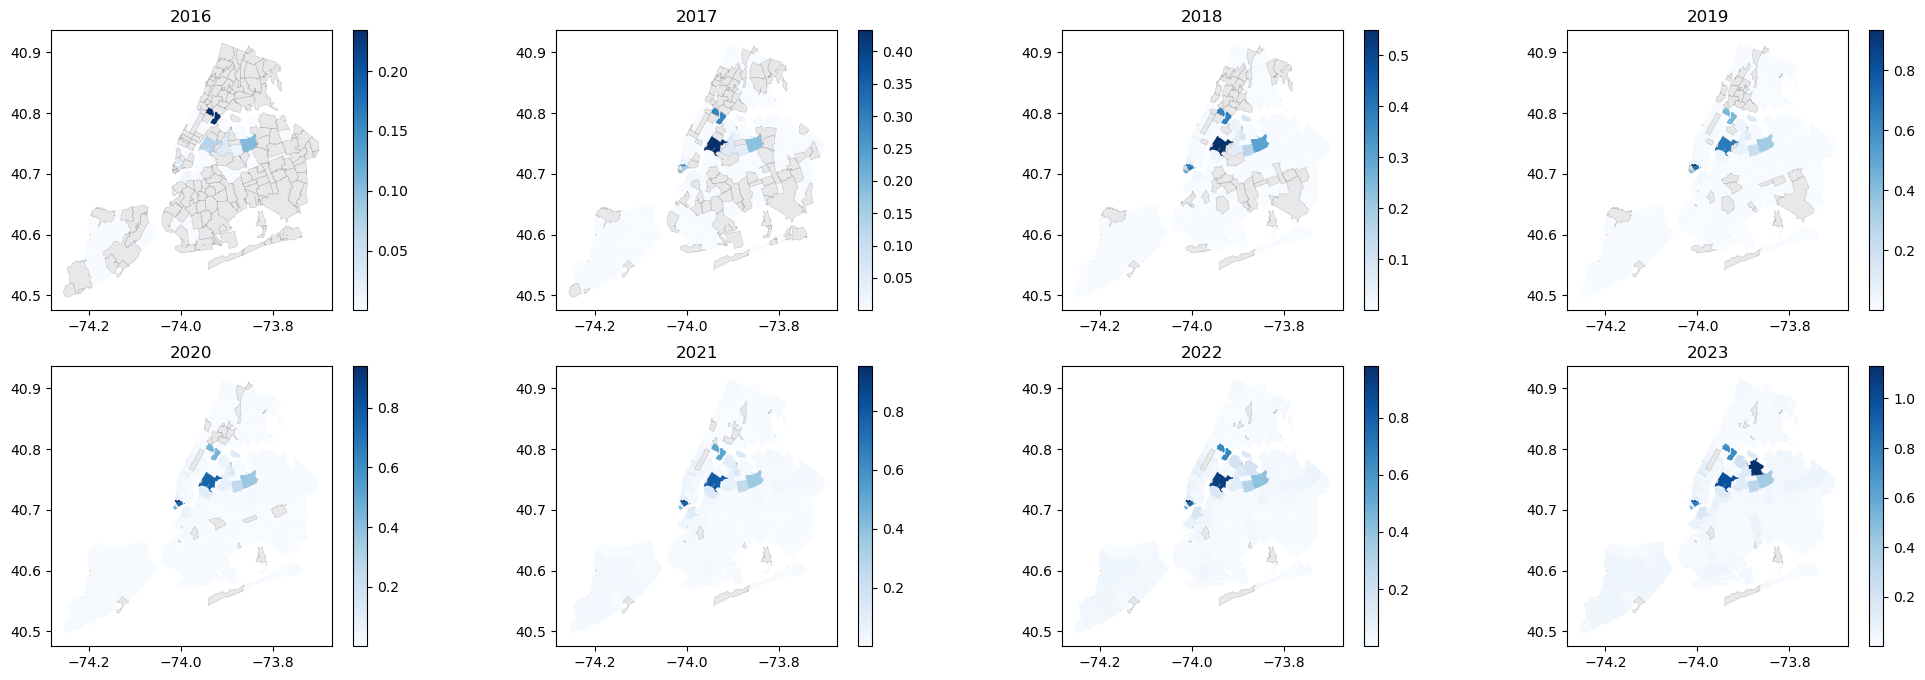

In [45]:
# plot by num of ev per car-owning houshold
y_list = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig,ax = plt.subplots(nrows=2, ncols=4,figsize=(25,8))

j=0
for i in range(len(y_list)):
    if i>=4:
        j = 1
        x_posi = i-4
    else:
        x_posi = i

    if y_list[i] <= 2017:
        est_col = 'est_household_w_car_2017'
    else:
        est_col = 'est_household_w_car_2022'
    plot_year = zipcode.merge(adoption[adoption['Registration Date'].dt.year.isin(y_list[:i+1])].groupby('ZIP Code').sum()['Vehicle Count'], how='left',
              left_on='MODZCTA', right_on='ZIP Code')
    plot_year['ev_per_household'] = (plot_year['Vehicle Count']/plot_year[est_col]).apply(lambda x: x if x!=np.inf else None)
    print(plot_year['ev_per_household'].max())
    plot_year[['MODZCTA', 'ev_per_household']].to_csv('ev_per_household/ev_adoption_{}.csv'.format(y_list[i]), index=False)
    plot_year.plot(ax=ax[j][x_posi], column='ev_per_household', cmap='Blues',legend=True,
                                                           missing_kwds = {"color": "lightgrey", ## what to do with missing values
                                                                                        "edgecolor": "grey",
                                                                                        "linewidth": 0.3,
                                                                                        "alpha": 0.5
                                                                                        },)
    ax[j][x_posi].set_title(str(y_list[i]))

In [48]:
zipcode[['MODZCTA', 'geometry']].to_file('modified_zipcode.geojson', driver="GeoJSON") 

### EV Market (Car Company and Car Model in BEV and PHEV)

1. Use stacked bar chart to show growth of market in both BEV and PHEV
(check out full visualization in Report)

In [68]:
def bev_phev_car_data(car_type, year):
    adoption_car = adoption[(adoption['Drivetrain Type'] == car_type) & (adoption['Registration Date'].dt.year<=year)]

    car_pivot = adoption_car.groupby(by=['Vehicle Make', 'Vehicle Model']).sum()['Vehicle Count'].reset_index()
    top5_car = car_pivot.groupby('Vehicle Make').sum()['Vehicle Count'].sort_values(ascending=False)[:5].keys().tolist()
    car_pivot = car_pivot[car_pivot['Vehicle Make'].isin(top5_car)]

    #add type value for visualize stacked bar chart
    car_pivot['Type'] = ''

    for car, _ in car_pivot['Vehicle Make'].value_counts().items():
        selected_car = car_pivot[car_pivot['Vehicle Make']==car]
        for idx, type in zip(selected_car.index.to_list(), range(1, len(selected_car)+1)):
            car_pivot.at[idx, 'Type'] = 'Type'+str(type)

    car_pivot_num = car_pivot.pivot(index='Vehicle Make', columns='Type', values='Vehicle Count')
    car_pivot_num = car_pivot_num.reset_index()
    car_pivot_model = car_pivot.pivot(index='Vehicle Make', columns='Type', values='Vehicle Model')
    car_pivot_model = car_pivot_model.reset_index()

    car_pivot_num = car_pivot_num.fillna(0)
    car_pivot_model = car_pivot_model.fillna('')
    car_pivot_model.columns = ['Vehicle Make'] + [i+'_val' for i in car_pivot_model.columns[1:]]
    pd.concat([car_pivot_num, car_pivot_model.iloc[:, 1:]], axis=1).to_csv('bev_phev_car_data/{}_top5_{}.csv'.format(car_type, year), index=False)
    

In [ ]:
for year in range(2016, 2024):
    bev_phev_car_data('BEV', year)
    bev_phev_car_data('PHEV', year)

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_65953/2147363253.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phev_pivot = adoption_phev.groupby(by=['Vehicle Make', 'Vehicle Model']).sum()['Vehicle Count'].reset_index()


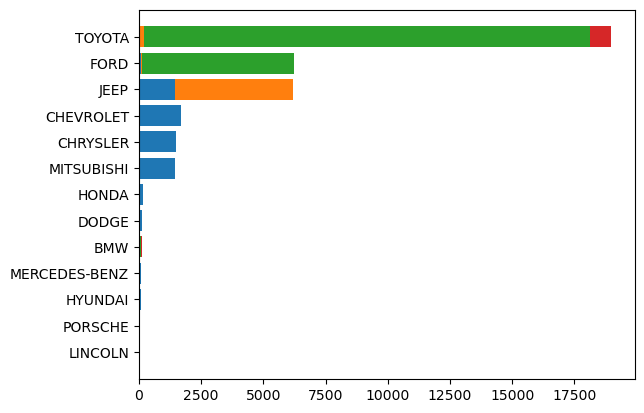

In [42]:
phev_pivot = adoption_phev.groupby(by=['Vehicle Make', 'Vehicle Model']).sum()['Vehicle Count'].reset_index()

#add type value for visualize stacked bar chart
phev_pivot['Type'] = ''
for car, val in phev_pivot['Vehicle Make'].value_counts().items():
    phev_car = phev_pivot[phev_pivot['Vehicle Make']==car]
    for idx, type in zip(phev_car.index.to_list(), range(1, len(phev_car)+1)):
        phev_pivot.at[idx, 'Type'] = 'Type'+str(type)

phev_pivot_num = phev_pivot.pivot(index='Vehicle Make', columns='Type', values='Vehicle Count')
phev_pivot_num = phev_pivot_num.reset_index()
phev_pivot_model = phev_pivot.pivot(index='Vehicle Make', columns='Type', values='Vehicle Model')
phev_pivot_model = phev_pivot_model.reset_index()

#sort by total descending order
phev_pivot_num['Total'] = phev_pivot_num.sum(numeric_only=True, axis=1)
phev_pivot_num = phev_pivot_num.sort_values("Total", ascending=True)
phev_pivot_num= phev_pivot_num.fillna(0)
phev_pivot_num

#prepare data array for plotting
x = phev_pivot_num['Vehicle Make']

y1 = phev_pivot_num['Type1']
y2 = phev_pivot_num['Type2']
y3 = phev_pivot_num['Type3']
y4 = phev_pivot_num['Type4']
b_y3 = np.add(y1, y2)
b_y4 = np.add(b_y3, y3)
b_y3

#plot the chart
fig, ax = plt.subplots()
rect1=ax.barh(x, y1, label='Type1')
rect2=ax.barh(x, y2, left=y1, label='Type2')
rect3=ax.barh(x, y3, left=b_y3, label='Type3')
rect4=ax.barh(x, y4, left=b_y4, label='Type4')

plt.show()